Melakukan import library yang akan digunakan untuk data analisis, data visualisasi, data preprocessing, dan modelling

In [83]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

# library for data preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

# library for modeling
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

Melakukan mounting google drive

In [84]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Importing dataset menggunakan google drive

In [86]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/netflix.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200
...,...,...,...,...,...,...,...
5039,2022-05-27,193.190002,195.250000,190.369995,195.190002,195.190002,8586000
5040,2022-05-31,196.179993,199.949997,190.800003,197.440002,197.440002,11398500
5041,2022-06-01,198.699997,202.740005,191.660004,192.910004,192.910004,8416200
5042,2022-06-02,192.020004,205.470001,191.720001,205.089996,205.089996,9623100


Mencetak dataset yang digunakan

In [87]:
print(f'Data memiliki {df.shape[0]} records dan {df.shape[1]} columns.')

Data memiliki 5044 records dan 7 columns.


Dataset yang digunakan memiliki 5044 records dan 7 columns.

1. Date merupakan hari dan tanggal dimana data tersebut didapatkan.
2. Open merupakan harga di mana keamanan finansial terbuka di pasar saat perdagangan dimulai.
3. High merupakan harga tertinggi di mana suatu saham diperdagangkan selama suatu periode.
4. Low merupakan harga terendah di mana suatu saham diperdagangkan selama suatu periode.
5. Close merupakan harga penutupan yang mana umumnya mengacu pada harga terakhir di mana perdagangan saham selama sesi perdagangan reguler.
6. Adj close merupakan harga penutupan yang disesuaikan harga penutupan saham untuk mencerminkan nilai saham tersebut setelah akuntansi, seperti right issue, stock split, dan stock reverse.
7. Volume digunakan untuk mengukur jumlah saham yang diperdagangkan dalam saham atau sebuah kontrak yang diperdagangkan di futures atau opsi. 

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5044 entries, 0 to 5043
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5044 non-null   object 
 1   Open       5044 non-null   float64
 2   High       5044 non-null   float64
 3   Low        5044 non-null   float64
 4   Close      5044 non-null   float64
 5   Adj Close  5044 non-null   float64
 6   Volume     5044 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 276.0+ KB


Mencetak missing value dalam dataframe

In [89]:
print('Total missing value dalam dataframe : ', df.isnull().sum().sum(), 'records')

Total missing value dalam dataframe :  0 records


Dari hasil output diatas, dapat dilihat bahwa dataframe tidak memiliki missing value, sehingga dapat dilanjutkan ke tahap berikutnya.

In [90]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5044.000000,5044.000000,5044.000000,5044.000000,5044.000000,5.044000e+03
mean,116.467981,118.237392,114.578719,116.456338,116.456338,1.653068e+07
std,168.740876,171.140864,166.119837,168.668232,168.668232,1.924487e+07
min,0.377857,0.410714,0.346429,0.372857,0.372857,2.856000e+05
25%,3.955357,4.031072,3.885357,3.958571,3.958571,6.168225e+06
50%,25.819285,26.342143,25.455000,25.802856,25.802856,1.059135e+07
75%,155.762497,157.654998,153.944996,155.869999,155.869999,1.986552e+07
max,692.349976,700.989990,686.090027,691.690002,691.690002,3.234140e+08


Data visualiation dengan menggunakan boxplot dari library seaborn.

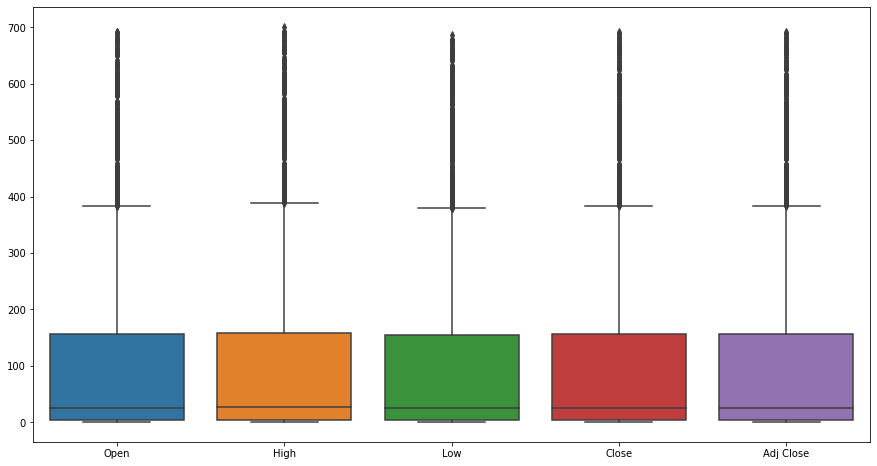

In [91]:
numerical_col = [col for col in df.columns if df[col].dtypes == 'float64']
plt.figure(figsize = (15,8))
sns.boxplot(data = df[numerical_col])
plt.show()

Output diatas merupakan visualisasi outlier pada data yang menggunakan boxplot dan library seaborn.

In [92]:
Q1 = df.quantile(.25)
Q3 = df.quantile(.75)
IQR = Q3 - Q1
bottom = Q1 - 1.5 * IQR
top = Q3 + 1.5 * IQR
df = df[~((df < bottom) | (df > top)).any(axis=1)]
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  


,Date,Open,High,Low,Close,Adj Close,Volume
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200
5,2002-05-31,1.078571,1.078571,1.071429,1.076429,1.076429,8464400


Mencetak jumlah data pada dataset.

In [93]:
print(f'Data memiliki {df.shape[0]} records dan {df.shape[1]} columns.')

Data memiliki 4196 records dan 7 columns.


Melakukan univariate analysis.

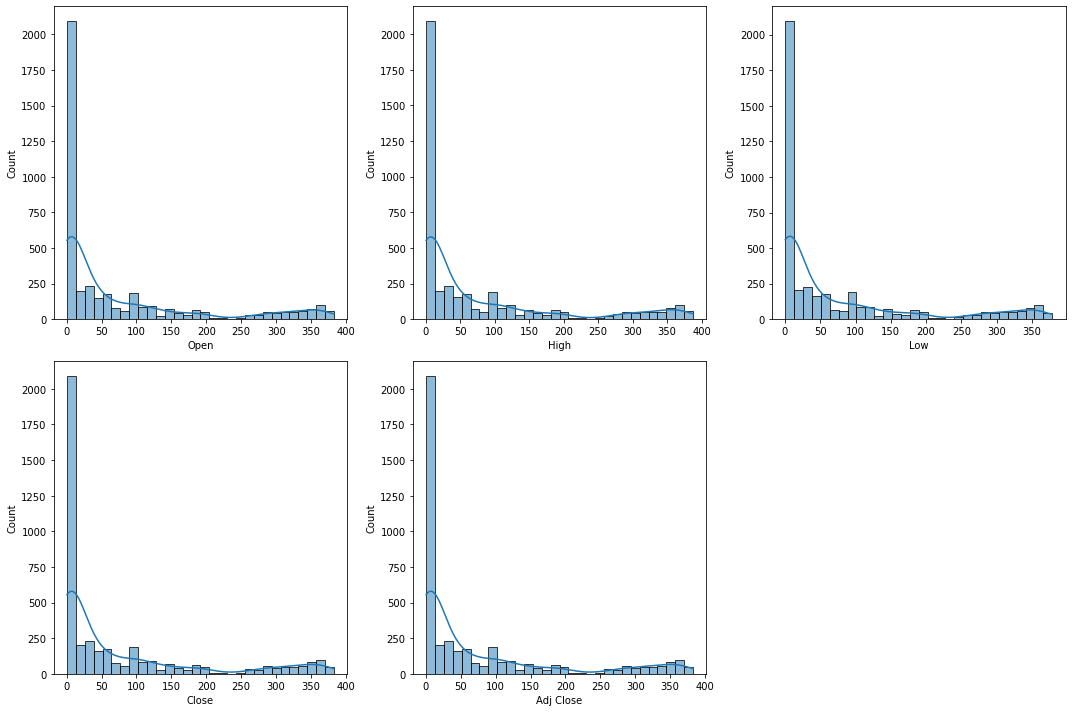

In [94]:
cols = 3
rows = 2
fig = plt.figure(figsize=(cols * 5, rows * 5))

for i, col in enumerate(numerical_col):
  ax = fig.add_subplot(rows, cols, i + 1)
  sns.histplot(x = df[col], bins = 30, kde = True, ax = ax)
fig.tight_layout()
plt.show()

Melakukan multivariate analysis.

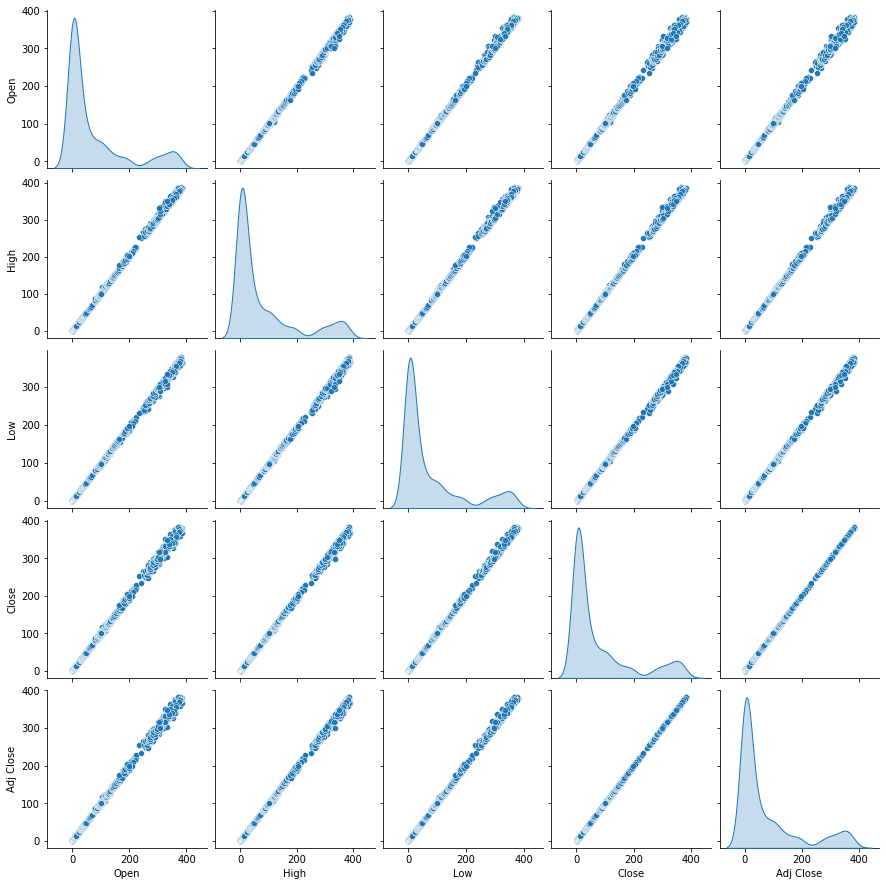

In [95]:
sns.pairplot(df[numerical_col], diag_kind = 'kde')
plt.show()

Membuat matriks korelasi untuk numerical feature.

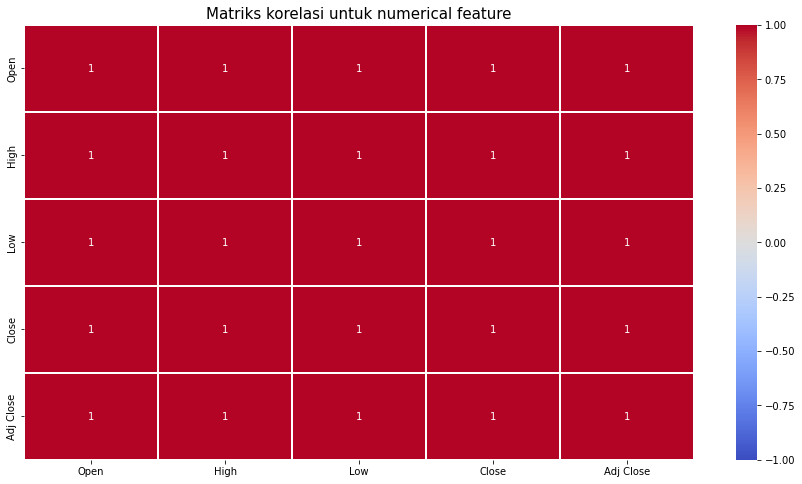

In [96]:
plt.figure(figsize = (15,8))
corr = df[numerical_col].corr().round(2)
sns.heatmap(data = corr, annot = True, vmin = -1, vmax = 1, cmap = 'coolwarm', linewidth = 1)
plt.title('Matriks korelasi untuk numerical feature', size = 15)
plt.show()

Pada proses ini akan dilakukan penghapusan pada kolom 'Time' dan 'Volume'. Penghapusan ini dikarenakan kolom-kolom tersebut dirasa tidak diperlukan oleh model dan data tersebut akan mengganggu model dalam proses training.

In [97]:
df = df.drop(['Date', 'Volume'], axis = 1)
df.head()

,Open,High,Low,Close,Adj Close
1,1.214286,1.225000,1.197143,1.210000,1.210000
2,1.213571,1.232143,1.157143,1.157143,1.157143
3,1.164286,1.164286,1.085714,1.103571,1.103571
4,1.107857,1.107857,1.071429,1.071429,1.071429
5,1.078571,1.078571,1.071429,1.076429,1.076429


Melakukan splitting pada dataset.

In [98]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)

print('Total X_train :', len(X_train), 'records')
print('Total y_train :', len(y_train), 'records')
print('Total X_test :', len(X_test), 'records')
print('Total y_test :', len(y_test), 'records')

Total X_train : 3356 records
Total y_train : 3356 records
Total X_test : 840 records
Total y_test : 840 records


Untuk melakukan normalisasi data, maka disini menggunakan library MinMaxScaler. Adanya normalisasi pada data bertujuan agar model lebih cepat dalam mempelajari data, karena data tersebut telah diubah pada rentang tertentu seperti antara 0 dan 1.

In [99]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

models = pd.DataFrame(columns = ['train_mse', 'test_mse'], index = ['SVR', 'KNN', 'GradientBoosting'])

Pada prose ini dilakukan hyperparameter tuning yang mana nantinya model dapat berjalan dengan performa terbaik. Dalam hyperparameter tuning ini biasanya akan ditentukan secara acak oleh teknisi. Namun, jika tidak ingi terjadi kesalahan dalam menentukan hyperparameter mana yang terbaik, maka dapat menggunakan GridSearch. GridSearch merupakan sebuah teknik yang memungkinkan untuk menguji beberapa hyperparameter sekaligus pada sebuah model.

In [100]:
def grid_search(model, hyperparameters):
  results = GridSearchCV(
      model,
      hyperparameters,
      cv = 5,
      verbose = 1,
      n_jobs = 6)

  return results
  
svr = SVR()
hyperparameters = {
    'kernel': ['rbf'],
    'C': [0.001, 0.01, 0.1, 10, 100, 1000],
    'gamma': [0.3, 0.03, 0.003, 0.0003]
}

svr_search = grid_search(svr, hyperparameters)
svr_search.fit(X_train, y_train)
print(svr_search.best_params_)
print(svr_search.best_score_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
{'C': 1000, 'gamma': 0.3, 'kernel': 'rbf'}
0.9999994998572698


n_neighbors, hyperparameter ini adalah jumlah tetangga yang diperlukan untuk menentukan letak data baru.

In [101]:
knn = KNeighborsRegressor()
hyperparameters = {
    'n_neighbors': range(1, 10)}

knn_search = grid_search(knn, hyperparameters)
knn_search.fit(X_train, y_train)
print(knn_search.best_params_)
print(knn_search.best_score_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
{'n_neighbors': 2}
0.9999454150211887


Model training

In [102]:
svr = SVR(C = 10, gamma = 0.3, kernel = 'rbf')
svr.fit(X_train, y_train)

SVR(C=10, gamma=0.3)

Gradient Boosting Regression

In [103]:
gradient_boost = GradientBoostingRegressor(criterion = 'squared_error', learning_rate = 0.01, n_estimators = 1000)
gradient_boost.fit(X_train, y_train)

GradientBoostingRegressor(criterion='squared_error', learning_rate=0.01,
                          n_estimators=1000)

K-Nearest Neighbors (KNN)

In [104]:
knn = KNeighborsRegressor(n_neighbors = 9)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=9)

Model evaluation

In [105]:
model_dict = {
    'SVR': svr,
    'GradientBoosting': gradient_boost,
    'KNN': knn,
}

for name, model in model_dict.items():
  models.loc[name, 'train_mse'] = mean_squared_error(y_train, model.predict(X_train))
  models.loc[name, 'test_mse'] = mean_squared_error(y_test, model.predict(X_test))

models.head()

,train_mse,test_mse
SVR,2.688962,2.823519
KNN,0.651909,1.368729
GradientBoosting,0.000865,0.210018


Plot diagram

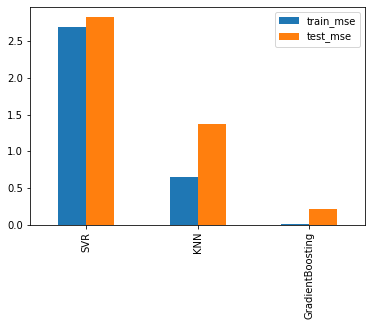

In [106]:
models.sort_values(by = 'test_mse', ascending = False).plot(kind = 'bar', zorder = 3)